## HW04-05-2D Random Walk 
## Paimah Safarian 96109628

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [31]:
def twoD_random_walk(l, time):
    r2   = np.zeros(time)
    latt = np.zeros((l, l))
    latt[int(l/2), int(l/2)] = 1
    checked = 0
    
    for t in range(time):
        checked = 0
        for y in range(l):
            for x in range(l):
                if latt[x, y] == 1:
                    checked = 1
                    r2[t] = (x - int(l/2)) ** 2 + (y - int(l/2)) ** 2
                    latt[x, y] = 0
                    
                    p = random.random()
                    if   p <= 0.25: latt[x+1, y] = 1
                    elif p <= 0.5 : latt[x-1, y] = 1
                    elif p <= 0.75: latt[x, y+1] = 1
                    elif p <= 1   : latt[x, y-1] = 1
                    break
            if checked == 1:
                break
                
    return r2


Wall time: 3min 44s


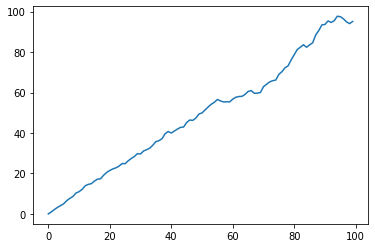

In [45]:
%%time

time = 100
l    = 200
ave  = 100 
r2_s = np.zeros((ave, time))
r2_m = np.zeros(time)

for m in range(ave):
    r2_s[m, :] = twoD_random_walk(l, time)

for t in range(time):
    r2_m[t] = np.mean(r2_s[:, t])
    
plt.plot(r2_m)

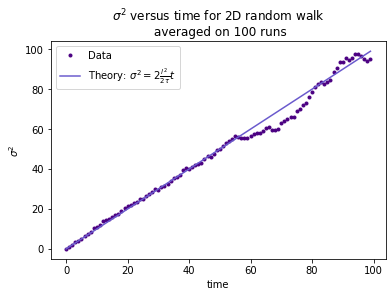

In [58]:
plt.plot(r2_m, '.', c = 'indigo', label = 'Data')
plt.plot(np.arange(time), '-', c = 'slateblue', label = r'Theory: $\sigma^2 = 2\frac{l^2}{2\tau} t $')
plt.title("$\sigma^2$ versus time for 2D random walk\n averaged on {} runs".format(ave))
plt.legend()
plt.ylabel('$\u03C3^2$')
plt.xlabel("time")
plt.savefig("sigma.png")